In [95]:
import torch
import utils
import matplotlib.pyplot as plt
import torch.nn.functional as F

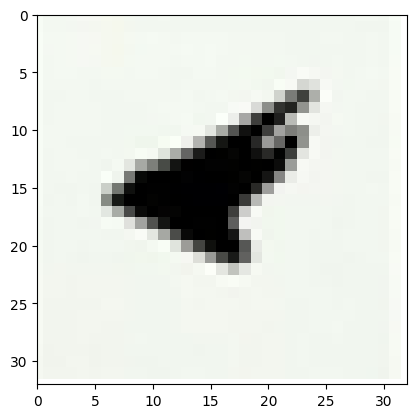

In [190]:
data = utils.test_data[21]
plt.imshow(data[0].detach().numpy().transpose(1, 2, 0))
# plt.hlines([i + 0.5 for i in range(32)], xmin=0, xmax=32, colors='lightgrey')
# plt.vlines([i + 0.5 for i in range(32)], ymin=0, ymax=32, colors='lightgrey')
plt.xlim(0, 32)
plt.ylim(32, 0)
plt.show()

In [30]:
image = data[0]

In [36]:
torch.max(torch.abs(image[0] - image[1])), torch.max(
    torch.abs(image[0] - image[2])
), torch.max(torch.abs(image[1] - image[2]))

(tensor(0.0275), tensor(0.0314), tensor(0.0431))

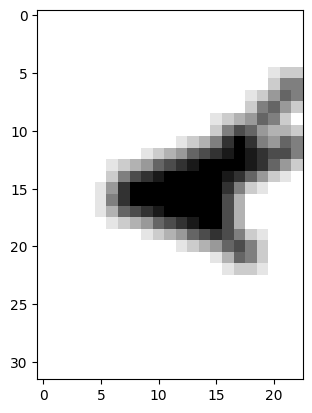

In [157]:
x0 = torch.zeros((3, 32, 6))
x1 = torch.zeros((3, 32, 1))
x1[:, 16, 0] = 1
x2 = torch.zeros((3, 32, 3))
x2[:, 14:18, :] = 1
x3 = torch.zeros((3, 32, 3))
x3[:, 13:19, :] = 1
x4 = torch.zeros((3, 32, 3))
x4[:, 12:20, :] = 1
x5 = torch.zeros((3, 32, 1))
x5[:, 10:21, :] = 1
y0 = torch.zeros(3, 16, 2)
y0[:, 10:15, :] = 1
y1 = torch.zeros(3, 16, 2)
y1[:, 4:6, :] = 1
x6 = torch.concat((y0, y1), dim=1)
y0 = torch.zeros(3, 10, 2)
y0[:, 8:10, :] = 1
y1 = torch.zeros(3, 22, 2)
y1[:, 2:4, :] = 1
x7 = torch.concat((y0, y1), dim=1)
y0 = torch.zeros(3, 10, 2)
y0[:, 6:8, :] = 1
y1 = torch.zeros(3, 22, 2)
y1[:, 1:3, :] = 1
x8 = torch.concat((y0, y1), dim=1)

x = torch.concat((x0, x1, x2, x3, x4, x5, x6, x7, x8), dim=2)
y = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
x = 0.9 * y + 0.1 * x
x = 1 - x
plt.imshow(x.detach().numpy().transpose(1, 2, 0))
# plt.hlines([i + 0.5 for i in range(32)], xmin=0, xmax=32, colors='lightgrey')
# plt.vlines([i + 0.5 for i in range(32)], ymin=0, ymax=32, colors='lightgrey')
plt.show()

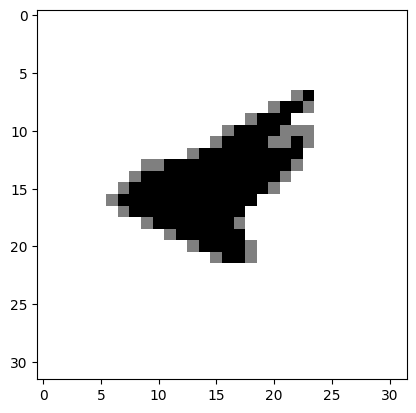

In [204]:
x = torch.ones(3, 32, 32)
set_to_half = torch.argwhere(torch.mean(image, dim=0) < 2 / 3)
x[:, points[:, 0], points[:, 1]] = 0.5
set_to_zero = torch.argwhere(torch.mean(image, dim=0) < 1 / 3)
x[:, points[:, 0], points[:, 1]] = 0
plt.imshow(x.detach().numpy().transpose(1, 2, 0), cmap="Greys")
plt.show()

In [201]:
torch.argwhere(torch.mean(image.transpose(2, 1), dim=0) < 0.6)

tensor([[ 6, 16],
        [ 7, 15],
        [ 7, 16],
        [ 8, 14],
        [ 8, 15],
        [ 8, 16],
        [ 8, 17],
        [ 9, 14],
        [ 9, 15],
        [ 9, 16],
        [ 9, 17],
        [10, 13],
        [10, 14],
        [10, 15],
        [10, 16],
        [10, 17],
        [10, 18],
        [11, 13],
        [11, 14],
        [11, 15],
        [11, 16],
        [11, 17],
        [11, 18],
        [12, 13],
        [12, 14],
        [12, 15],
        [12, 16],
        [12, 17],
        [12, 18],
        [12, 19],
        [13, 12],
        [13, 13],
        [13, 14],
        [13, 15],
        [13, 16],
        [13, 17],
        [13, 18],
        [13, 19],
        [14, 12],
        [14, 13],
        [14, 14],
        [14, 15],
        [14, 16],
        [14, 17],
        [14, 18],
        [14, 19],
        [14, 20],
        [15, 11],
        [15, 12],
        [15, 13],
        [15, 14],
        [15, 15],
        [15, 16],
        [15, 17],
        [15, 18],
        [1

In [223]:
x = torch.randn(2, 3, 32, 32)
zero = torch.amin(x - x, dim=(1, 2, 3), keepdim=True)
half = F.sigmoid(zero)
first = torch.concat(
    [
        torch.concat(
            [zero if torch.mean(image[:, i, j]) < 1 / 3 else half for j in range(32)],
            dim=3,
        )
        for i in range(32)
    ],
    dim=2,
)
second = torch.concat(
    [
        torch.concat(
            [zero if torch.mean(image[:, i, j]) < 2 / 3 else half for j in range(32)],
            dim=3,
        )
        for i in range(32)
    ],
    dim=2,
)
target = first + second
torch.concat((target, +target, target))

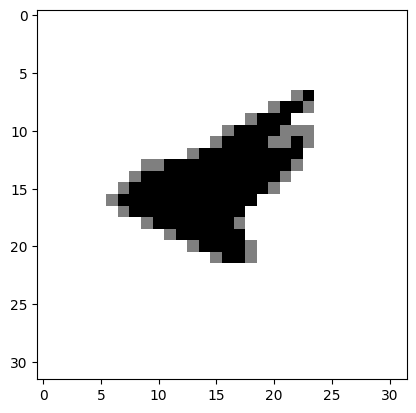

In [224]:
plt.imshow(target[0].detach().numpy().transpose(1, 2, 0))
plt.show()

In [240]:
import pyperclip

pyperclip.copy(
    str(
        [
            [torch.mean(image[:, i, j]).item() < 1 / 3 for j in range(32)]
            for i in range(32)
        ]
    )
)

In [ ]:
x = torch.randn(2, 3, 32, 32)
zero = torch.amin(x - x, dim=(2, 3), keepdim=True)
half = F.sigmoid(zero)
first = torch.concat(
    [
        torch.concat(
            [zero if torch.mean(image[:, i, j]) < 1 / 3 else half for j in range(32)],
            dim=3,
        )
        for i in range(32)
    ],
    dim=2,
)
second = torch.concat(
    [
        torch.concat(
            [zero if torch.mean(image[:, i, j]) < 2 / 3 else half for j in range(32)],
            dim=3,
        )
        for i in range(32)
    ],
    dim=2,
)
target = first + second